In [46]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import os
import seaborn as sns

def shorten(arr, factor=10):
    arr_shape = list(arr.shape)
    arr_shape[0] = int(arr_shape[0]/factor)
    new_arr = np.zeros(arr_shape)
    for i in range(arr_shape[0]):
        new_arr[i] = arr[i*factor]
    return new_arr

In [1]:
# Change here for different observation gap and observation covariance parameter
mu=0.5
ob_gap=0.01

os.chdir('/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data')
#Partial or full observation
ob_dim=1
ecov=4.0 
ebias=6.0     
factor_=int(ob_gap/0.01)

#load the state
#state=np.load('Trajectory_{}_T={}.npy'.format(0.01,500))
state=shorten(np.load('Trajectory_{}_T={}.npy'.format(0.01,500)),factor=factor_)

k=2
N=40 
l_scale=0
alpha=1.0

# State and obs
os.chdir(os.getcwd()+'/ob{}'.format(k)) 
obs=np.load('ob{}_gap_{}_H1__mu={}_obs_cov1.npy'.format(k,0.01,mu))

#Go inside the data folder......................................
folder_label='ebias={}_ecov={}_obs={}_ens={}_ocov={}_gap={}_alpha={}_loc=none_r={}'.format(ebias, ecov,ob_dim,N,mu,ob_gap,alpha,l_scale)
#file_label='bias={}_obs={}_ens={}_Mcov={},ocov={}_,gap={}_alpha={}_loc=none_r={}'.format(bias,ob_dim,N,ens_cov,mu,ob_gap,alpha,l_scale)
os.chdir(folder_label)

#Load data....
f_ens=np.load('predicted_ens.npy')
a_ens=np.load('filtered_ens.npy') #ens has shape:=[time steps,system dimension,ensemble number]
f_mean=np.mean(f_ens,axis=2)
a_mean=np.mean(a_ens,axis=2)
#time=np.load(file_label+'time.npy')

NameError: name 'os' is not defined

In [ ]:
time=ob_gap*np.arange(f_mean.shape[0])


In [2]:
plt.figure(figsize=(16,8))
# Start time and end time chosen to view a part of time series
t_start=1000
t_stop=2000
# component to view
comp_=1
#plt.plot(time[t_start:t_stop],f_ens[t_start:t_stop,comp_],linestyle='solid',alpha=0.5) 
#plt.plot(time[t_start:t_stop],a_mean[t_start:t_stop,comp_],c='r',alpha=1,label='a_mean')
plt.plot(time[t_start:t_stop],f_mean[t_start:t_stop,comp_],c='r',alpha=1,label='f_mean')

plt.plot(time[t_start:t_stop],a_ens[t_start:t_stop,comp_],c='blue',alpha=0.5)
plt.plot(time[t_start:t_stop],state[t_start:t_stop,comp_],c='black',label='State')
plt.scatter(time[t_start:t_stop],obs[t_start:t_stop],c='r',marker='.',label='obs')
    
plt.legend()
plt.title(r'The true state and analysis ensemble for X[{}]'.format(comp_))
#plt.xticks(time[t_start:t_stop],fontsize=12)
plt.legend(frameon='True')

NameError: name 'plt' is not defined

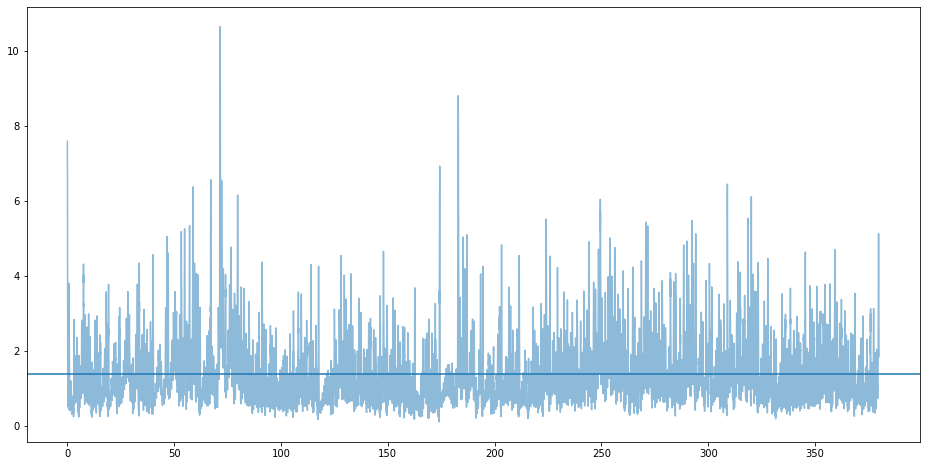

In [89]:
plt.figure(figsize=(16,8))
t_start=0
t_stop=38000
plt.plot(time[t_start:t_stop],np.sqrt(np.sum((state[t_start:t_stop]-a_mean[t_start:t_stop])**2,axis=1)),linestyle='solid',alpha=0.5)
plt.axhline(np.mean(np.sqrt(np.sum((state[t_start:t_stop]-a_mean[t_start:t_stop])**2,axis=1))))